<h1>McDonalds</h1>

In this notebook I will be exploring the mcdonalds menu dataset (available at [kaggle](https://www.kaggle.com/datasets/danilchurko/mcdonalds-uk-menu-dataset)) to explore how machine learning can be used to infer the health and value of a mc donalds menu items based on their price, salt and sugar values.

In [5]:
#importing libraries that I plan to use.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [6]:
#reads our the mcdonalds database file so we can access it.
mcdonalds_df = pd.read_csv('mcdonalds_dataset.csv', sep=',')

In [7]:
print(mcdonalds_df) 
#prints mcdonalds database

       #                   product_name product_calories product_price  \
0      0             Bacon Mayo Chicken        kcal: 332        £ 1.99   
1      1                   Mayo Chicken        kcal: 285        £ 1.39   
2      2                      Hamburger        kcal: 251         £1.19   
3      3                          Fries        kcal: 237        £ 1.19   
4      4                   Cheeseburger        kcal: 298         £1.39   
..   ...                            ...              ...           ...   
147  147                Muffin with Jam        kcal: 214        £ 1.49   
148  148                     Hash Brown        kcal: 127        £ 1.19   
149  149               Pancakes & Syrup        kcal: 477        £ 3.29   
150  150  Pancakes & Sausage with Syrup        kcal: 612        £ 3.29   
151  151                       Porridge        kcal: 154        £ 1.99   

     Protein  Carbs   Fat  Salt  Saturates  Sugars  
0       17.0   38.0  12.0  1.40        2.2     4.6  
1    

In [8]:
mcdonalds_df.keys()

Index(['#', 'product_name', 'product_calories', 'product_price', 'Protein',
       'Carbs', 'Fat', 'Salt', 'Saturates', 'Sugars'],
      dtype='object')

In [9]:
mcdonalds_df['product_calories'].value_counts

<bound method IndexOpsMixin.value_counts of 0      kcal: 332
1      kcal: 285
2      kcal: 251
3      kcal: 237
4      kcal: 298
         ...    
147    kcal: 214
148    kcal: 127
149    kcal: 477
150    kcal: 612
151    kcal: 154
Name: product_calories, Length: 152, dtype: object>

In [68]:
mcdonalds_df['Salt'].value_counts()
#shows the most common salt values

Salt
1.90    9
1.20    6
1.80    6
0.44    4
3.40    4
1.30    4
2.80    4
0.05    4
0.19    3
3.20    3
1.00    3
2.50    3
2.30    3
1.60    3
0.02    3
0.20    3
2.20    3
1.50    3
0.31    3
0.27    2
0.39    2
0.72    2
0.33    2
0.43    2
0.41    2
1.40    2
0.49    2
3.30    2
0.01    2
1.70    2
2.60    2
2.40    2
3.00    2
2.70    2
2.00    2
1.10    2
0.59    1
0.22    1
0.35    1
0.69    1
0.26    1
0.30    1
0.25    1
0.29    1
0.11    1
0.94    1
0.64    1
0.21    1
0.82    1
0.40    1
1.04    1
0.85    1
0.66    1
1.98    1
1.48    1
2.10    1
3.70    1
3.80    1
0.57    1
0.17    1
Name: count, dtype: int64

C:\Users\Will\AppData\Local\Temp\ipykernel_13640\2544026168.py:18: UserWarning: Glyph 127793 (\N{SEEDLING}) missing from current font.
  plt.tight_layout()
C:\Users\Will\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127793 (\N{SEEDLING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


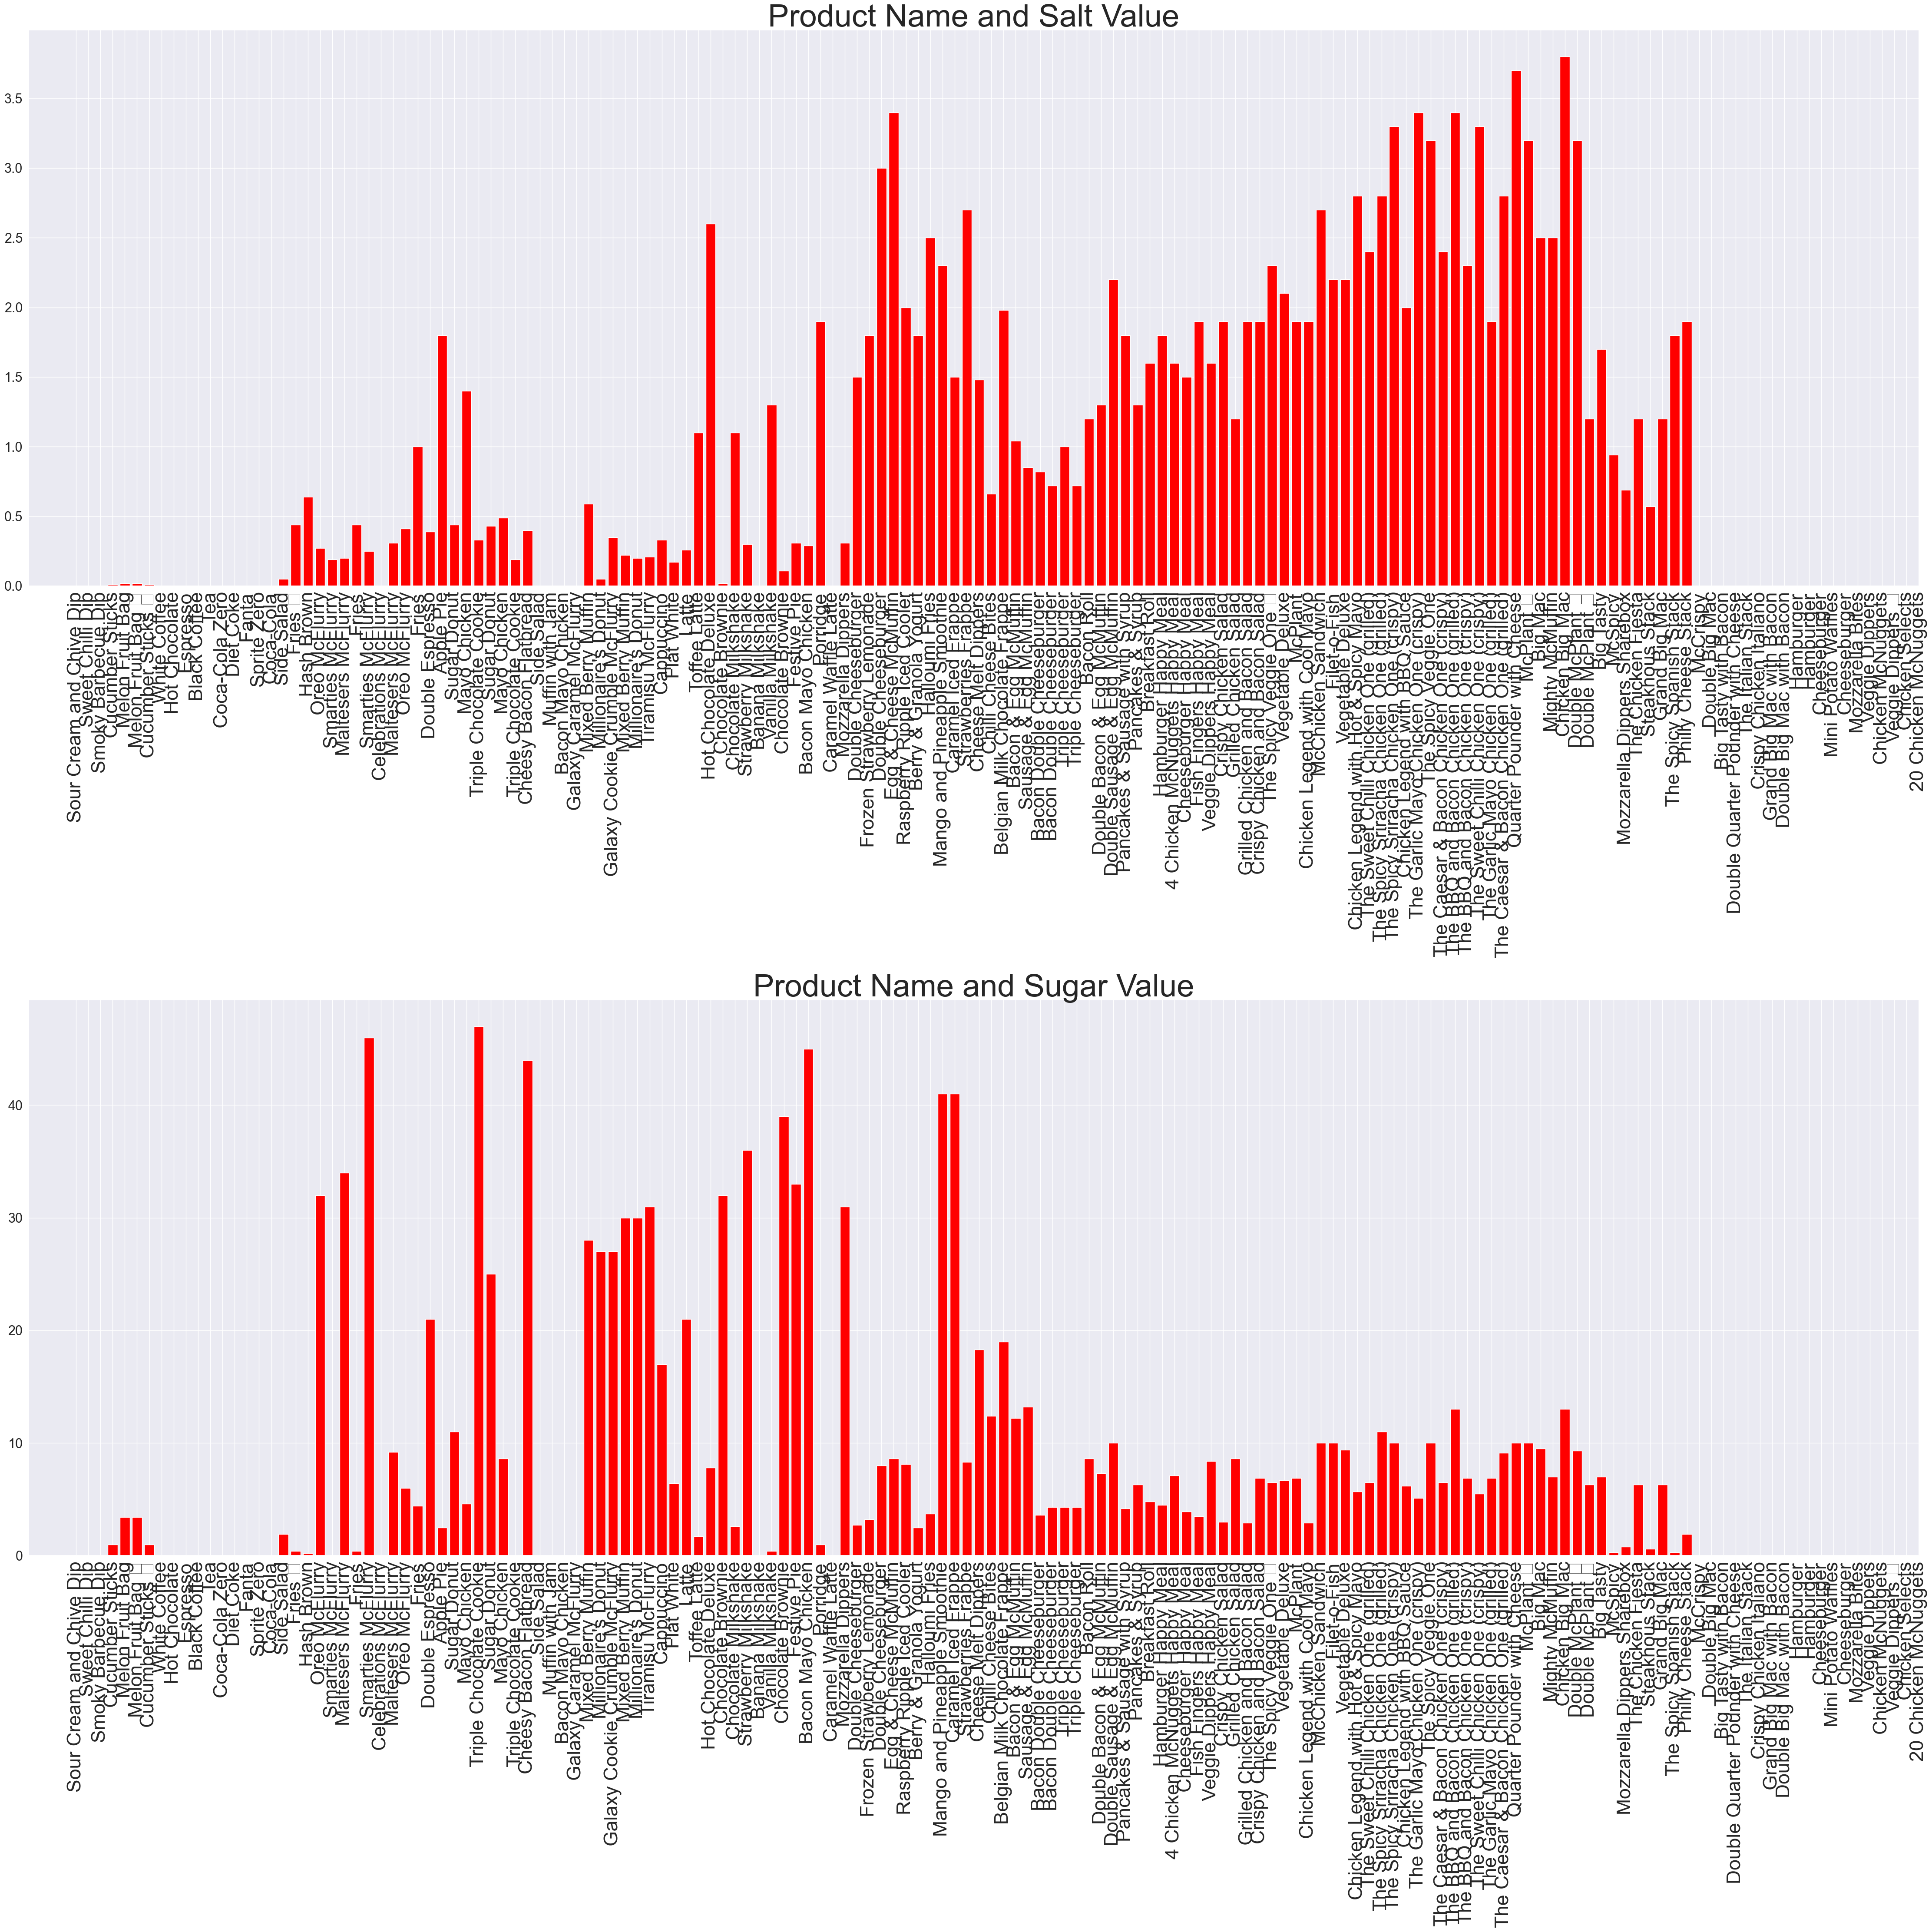

In [144]:
fig, axs = plt.subplots(2, figsize=(45, 45))

# Width of the space between bars.
bar_width = 0.7

# Salt graph: Product Name and Salt number
axs[0].bar(mcdonalds_df['product_name'], mcdonalds_df['Salt'], color='red')
axs[0].set_title('Product Name and Salt Value',fontsize=52)
axs[0].set_xticks(range(len(mcdonalds_df['product_name'])))  # explicitly set x-ticks position
axs[0].set_xticklabels(mcdonalds_df['product_name'], rotation=90, fontsize=32)  # adjust fontsize if necessary

# Sugars graph: Product Name and Sugar number
axs[1].bar(mcdonalds_df['product_name'], mcdonalds_df['Sugars'], color='red')
axs[1].set_title('Product Name and Sugar Value',fontsize=52)
axs[1].set_xticks(range(len(mcdonalds_df['product_name'])))  # explicitly set x-ticks position
axs[1].set_xticklabels(mcdonalds_df['product_name'], rotation=90, fontsize=32)  # adjust fontsize if necessary

plt.tight_layout()
plt.show()

In [204]:
highest_salt_product = mcdonalds_df.loc[mcdonalds_df['Salt'].idxmax(), ['product_name', 'Salt', 'Sugars', 'product_price']]
print(Highest_salt_product)

product_name     Grand Big Mac with Bacon
Salt                                  3.8
Sugars                               13.0
product_price                      £ 6.59
Name: 38, dtype: object


In [205]:
lowest_salt_product = mcdonalds_df.loc[mcdonalds_df['Salt'].idxmin(), ['product_name', 'Salt', 'Sugars', 'product_price']]
print(lowest_salt_product)

product_name     Cucumber Sticks
Salt                        0.01
Sugars                       1.0
product_price                79P
Name: 47, dtype: object


In [206]:
highest_sugars_product = mcdonalds_df.loc[mcdonalds_df['Sugars'].idxmax(), ['product_name', 'Salt', 'Sugars', 'product_price']]
print(Highest_sugars_product)

product_name     Galaxy Caramel McFlurry
Salt                                0.33
Sugars                              47.0
product_price                     £ 1.69
Name: 108, dtype: object


In [207]:
lowest_sugars_product = mcdonalds_df.loc[mcdonalds_df['Sugars'].idxmin(), ['product_name', 'Salt', 'Sugars', 'product_price']]
print(lowest_sugars_product)

product_name     Hash Brown
Salt                   0.64
Sugars                  0.2
product_price        £ 1.19
Name: 148, dtype: object


In [209]:
lowest_price_product = mcdonalds_df.loc[mcdonalds_df['product_price'].idxmin(), ['product_name', 'Salt', 'Sugars', 'product_price']]
print(lowest_price_product)

product_name     Sour Cream and Chive Dip
Salt                                  NaN
Sugars                                NaN
product_price                         30P
Name: 94, dtype: object


In [210]:
highest_price_product = mcdonalds_df.loc[mcdonalds_df['product_price'].idxmax(), ['product_name', 'Salt', 'Sugars', 'product_price']]
print(highest_price_product)

product_name     20 Chicken McNuggets
Salt                              1.9
Sugars                            1.9
product_price                   £5.99
Name: 44, dtype: object


ValueError: If using all scalar values, you must pass an index

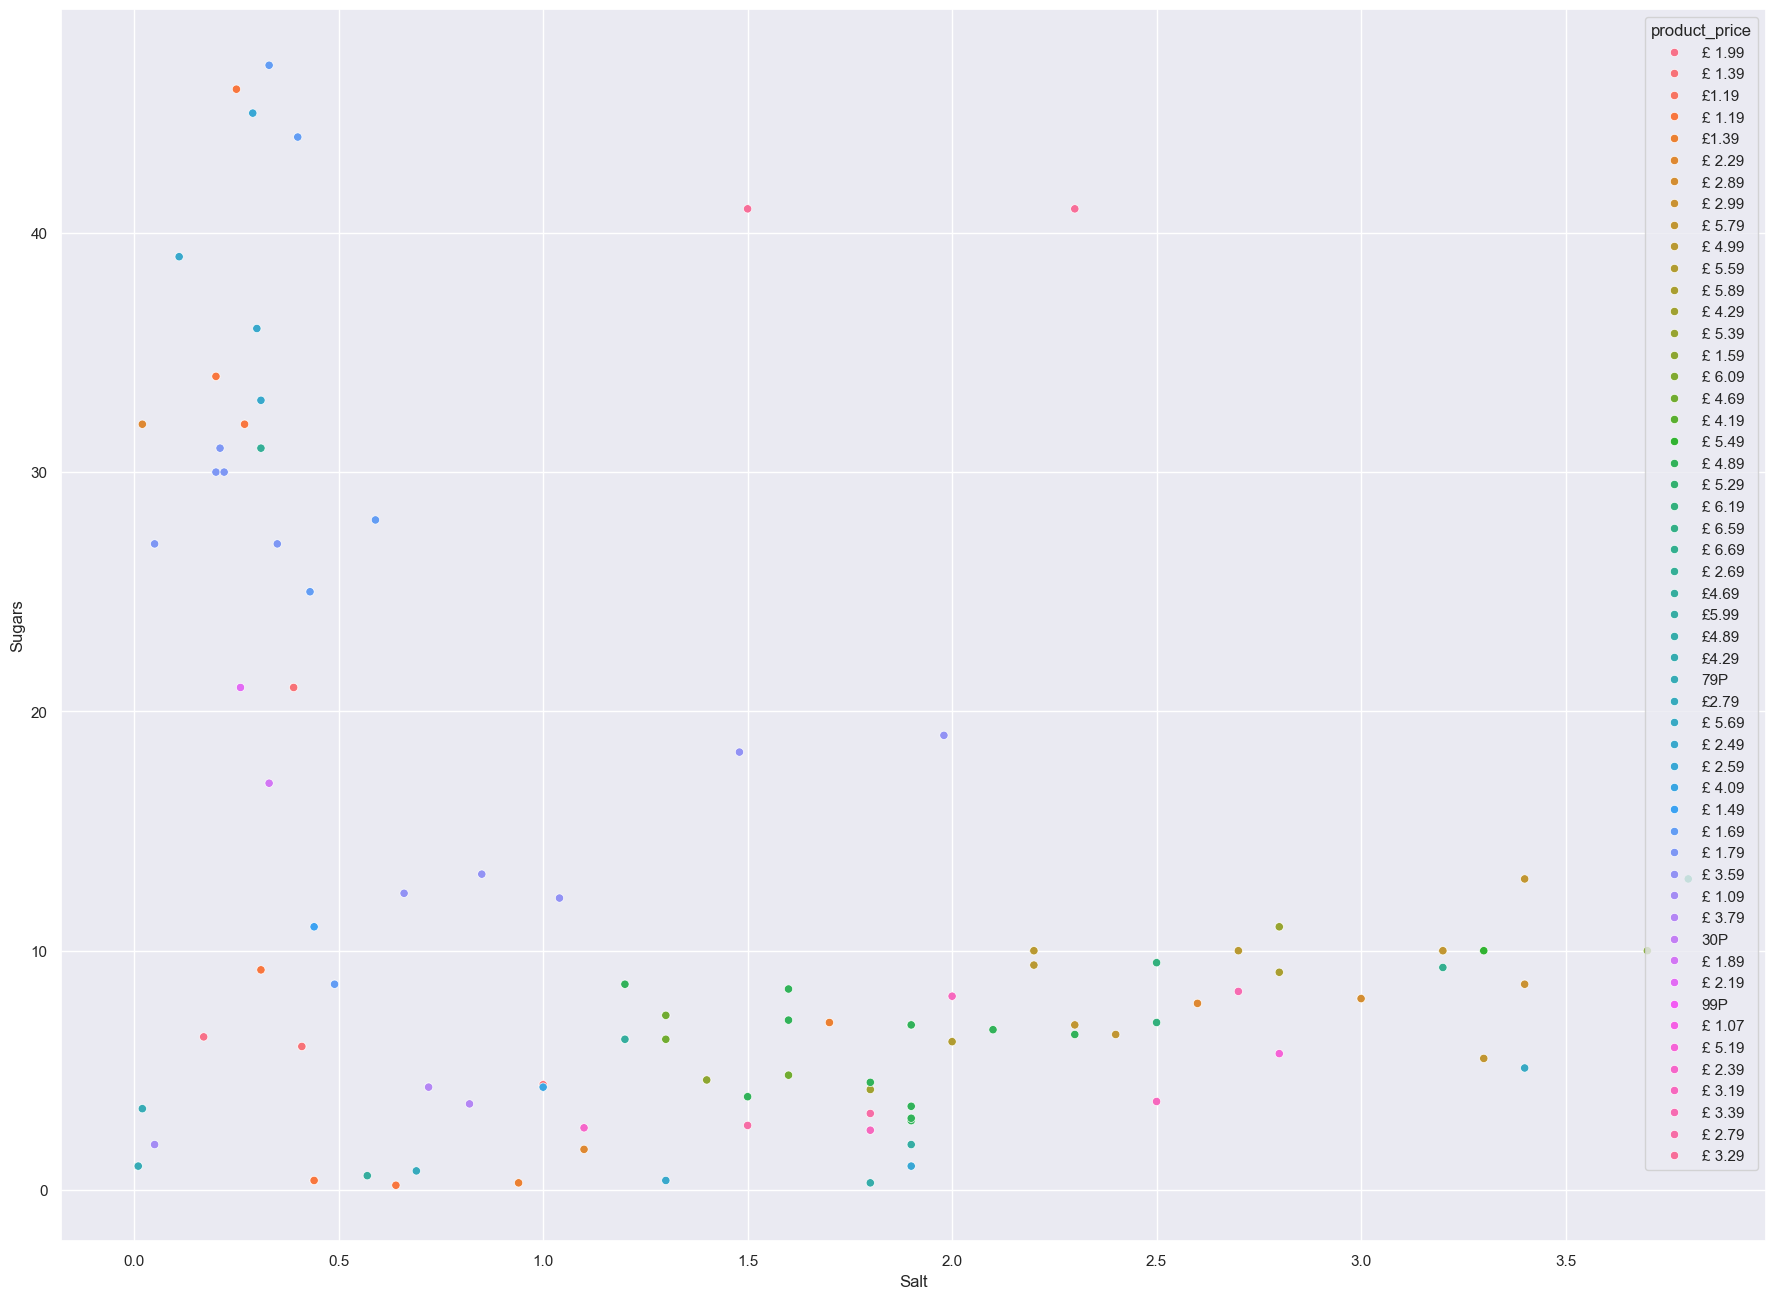

In [12]:
lowest_salt_sugar = mcdonalds_df.loc[mcdonalds_df['Salt'].idxmin()]
highest_cost = mcdonalds_df.loc[mcdonalds_df['product_price'].idxmax()]

fig, ax = plt.subplots(figsize=(22, 16))
sns.scatterplot(x='Salt', y='Sugars', data=mcdonalds_df, hue='product_price', ax=ax)
sns.scatterplot(x=lowest_salt_sugar['Salt'], y=lowest_salt_sugar['Sugars'], color='green', s=200, ax=ax)
sns.scatterplot(x=highest_cost['Salt'], y=highest_cost['Sugars'], color='red', s=200, ax=ax)
ax.set_xlabel('Salt')
ax.set_ylabel('Sugars')
ax.set_title('Lowest Salt and Sugars Products vs Highest Cost')
plt.show()